In [6]:
from helpers import *
import json
import ast

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
samples_df = load_queries()
listings_df = load_kb()
set_paper_style()

## Agent/Moderator Success

new file name:  agent_success_aggressive_all.pdf
/Users/ashmi/Code/Scripts/phd/travel-crs/tests/multi_ctrs/../../plots/pdf/agent_success/agent_success_aggressive_all.pdf


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ashmi/Code/Scripts/phd/travel-crs/tests/multi_ctrs/../../plots/pdf/agent_success/agent_success_aggressive_all.pdf'

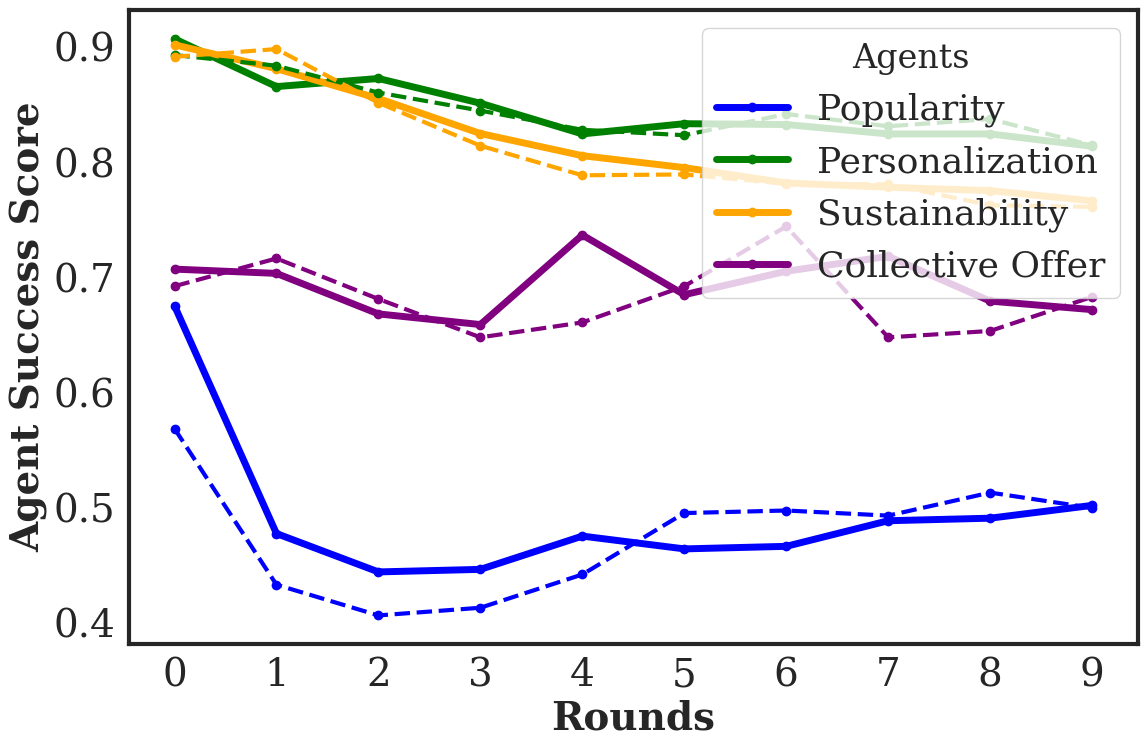

In [10]:
MODELS = ["GPTo4Mini", "Gemini2Point5Flash"]
methods = ["aggressive"]
popularity_levels = [None, "low", "medium", "high"]

for method in methods:
    for pop_level in popularity_levels:
        hal_1, rely_1, rev_1 = get_scores(samples_df, model="GPTo4Mini", folder_name=f"prompt_ranking_{method}", \
                                    hit_rate=False, scoring_method="prop", popularity=pop_level)
        hal_2, rely_2, rev_2 = get_scores(samples_df, model= "Gemini2Point5Flash", folder_name=f"prompt_ranking_{method}", \
                                    hit_rate=False, scoring_method="prop", popularity=pop_level)
        plot_together(rev_1, rev_2, "agent success", method, pop_level, rounds=10, collective=True)

## Agent Reliability

In [ ]:
MODELS = ["GPTo4Mini", "Gemini2Point5Flash"]
methods = ["aggressive", "majority"]
# popularity_levels = [None, "low", "medium", "high"]

for method in methods:
    hal_1, rely_1, rev_1 = get_scores(samples_df, model="GPTo4Mini", folder_name=f"prompt_ranking_{method}", \
                                hit_rate=False, scoring_method="prop", popularity=None)
    hal_2, rely_2, rev_2 = get_scores(samples_df, model= "Gemini2Point5Flash", folder_name=f"prompt_ranking_{method}", \
                                hit_rate=False, scoring_method="prop", popularity=None)
    plot_together(rely_1, rely_2, "agent reliability", method, pop_level= None, rounds=10, collective=False)

## Hallucination Rate

In [ ]:
MODELS = ["GPTo4Mini", "Gemini2Point5Flash"]
methods = ["aggressive", "majority"]
# popularity_levels = [None, "low", "medium", "high"]

for method in methods:
    hal_1, rely_1, rev_1 = get_scores(samples_df, model="GPTo4Mini", folder_name=f"prompt_ranking_{method}", \
                                hit_rate=False, scoring_method="prop", popularity=None)
    hal_2, rely_2, rev_2 = get_scores(samples_df, model= "Gemini2Point5Flash", folder_name=f"prompt_ranking_{method}", \
                                hit_rate=False, scoring_method="prop", popularity=None)
    plot_together(hal_1, hal_2, "hallucination", method, pop_level= None, rounds=10, collective=False)

## Legends

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

figlegend = pylab.figure(figsize=(6,8))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), "blue", \
                range(10), pylab.randn(10), "orange", \
                range(10), pylab.randn(10), "green",)
legend = figlegend.legend(handles=lines, labels=['Popularity', 'Personalization', 'Sustainability'], loc='center',)
legend.get_texts()[0].set_color('blue')   # Set first label to red
legend.get_texts()[1].set_color('orange') 
legend.get_texts()[2].set_color('green')
fig.show()
figlegend.show()
file_name = '../../plots/pdf/legend.png'
figlegend.savefig(file_name)
shutil.copy(file_name, os.getenv("PAPER_LOCATION") + '/plots/')

## Legend

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

figlegend = pylab.figure(figsize=(6,8))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), "blue", \
                range(10), pylab.randn(10), "orange", \
                range(10), pylab.randn(10), "green", \
                range(10), pylab.randn(10), "purple")
legend = figlegend.legend(handles=lines, \
                          labels=['Popularity', 'Personalization', 'Sustainability', 'Collective Offer'], \
                          loc='center',)

legend.get_texts()[0].set_color('blue')  
legend.get_texts()[1].set_color('orange') 
legend.get_texts()[2].set_color('green')
legend.get_texts()[3].set_color('purple')

# fig.show()
# figlegend.show()
file_name = '../../plots/pdf/legend_collective.png'
figlegend.savefig(file_name)
shutil.copy(file_name, os.getenv("PAPER_LOCATION") + '/plots/')

## Moderator Success Distribution Plot (KDE)

## Origin Proportion
We want to see in our collective offer, which agent offered that city

In [ ]:
origins = pd.DataFrame(get_origin_proportion(samples_df, method="test_prompting_few_shot", model="gpto4mini", rounds=10, popularity="low"))

In [ ]:
origins = origins.drop(columns=["config_id","coll_offers","cities","filters"]).groupby("round").mean().reset_index()

In [ ]:
origins

In [ ]:
df_melted = origins.melt(
    id_vars=['round'],
    value_vars=['popularity', 'constraint', 'sustainability'],
    var_name='score_type',
    value_name='score'
)

# Plot using seaborn
plt.figure(figsize=(22, 12))
sns.barplot(data=df_melted, x='round', y='score', hue='score_type')

plt.title('Accepted Candidates Origin - Prompt Ranking Aggressive for Low Pop Queries')
plt.xlabel('Round')
plt.ylabel('Score')
plt.legend(title='Score Type')
plt.tight_layout()
plt.show()

In [ ]:
df_melted = origins.melt(
    id_vars=['round'],
    value_vars=['popularity', 'constraint', 'sustainability'],
    var_name='score_type',
    value_name='score'
)

# Plot using seaborn
plt.figure(figsize=(22, 12))
sns.barplot(data=df_melted, x='round', y='score', hue='score_type')

plt.title('Grouped Bar Chart of Scores by Round')
plt.xlabel('Round')
plt.ylabel('Score')
plt.legend(title='Score Type')
plt.tight_layout()
plt.show()

## Conformity
Does the agent got swayed towatds other's focus